In [1]:
import os
import glob
import argparse
import matplotlib

# Keras / TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'
from keras.models import load_model
from layers import BilinearUpSampling2D
from tensorflow.keras.layers import Layer, InputSpec
from utils import predict, load_images, display_images
from matplotlib import pyplot as plt

In [2]:
images = os.listdir("D:/ehb328/term_project/DenseDepth/examples")
folder_path = "D:/ehb328/term_project/DenseDepth/examples/"
images = [folder_path + s for s in images]

In [3]:
# import PIL.Image


# rgba_image = PIL.Image.open("D:/ehb328/term_project/DenseDepth/examples/new4.png")
# rgb_image = rgba_image.convert('RGB')
# os.remove("D:/ehb328/term_project/DenseDepth/examples/new4.png")
# rgb_image.save("D:/ehb328/term_project/DenseDepth/examples/new4.png")

In [4]:
custom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}

print('Loading model...')
model = load_model('nyu.h5', custom_objects=custom_objects, compile=False)
# Load model into GPU / CPU

print('\nModel loaded nyu.h5.')

# Input images
inputs = load_images(images)
print('\nLoaded ({0}) images of size {1}.'.format(inputs.shape[0], inputs.shape[1:]))

Loading model...

Model loaded nyu.h5.

Loaded (13) images of size (480, 640, 3).


7/7 [==============================] - 51s 6s/step


d:\ehb328\DenseDepth\utils.py:77: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return skimage.util.montage(all_images, multichannel=True, fill=(0,0,0))


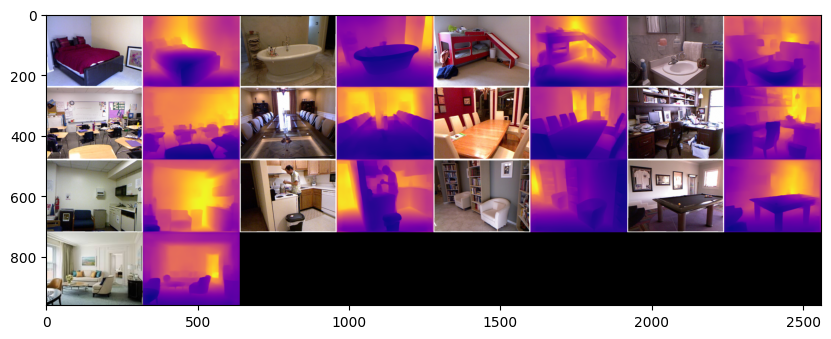

In [5]:
outputs = predict(model, inputs)

#matplotlib problem on ubuntu terminal fix
#matplotlib.use('TkAgg')   

# Display results
viz = display_images(outputs.copy(), inputs.copy())
plt.figure(figsize=(10,5))
plt.imshow(viz)
plt.show()